# CCDData as a container for CCD images

A `CCDData` object can store the data, mask and metadata for an image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import CCDData

%matplotlib inline

Read in a small sample CCD image

In [2]:
ccd = CCDData.read(get_pkg_data_filename('data/sip-wcs.fits', package='astropy.nddata.tests'))

The header or metadata is available via `ccd.header` or `ccd.meta`.

In [3]:
ccd.header

SIMPLE  =                    T / Created by ImageJ FITS_Writer                  
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  100 / length of data axis 1                          
NAXIS2  =                   50 / length of data axis 2                          
INSTRUME= 'Apogee Alta' /       instrument or camera used                       
DATE-OBS= '2011-09-01T02:09:05' / YYYY-MM-DDThh:mm:ss observation start, UT     
EXPTIME =   120.00000000000000 /Exposure time in seconds                        
EXPOSURE=   120.00000000000000 /Exposure time in seconds                        
SET-TEMP=  -18.899999618530273 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.015454250000001 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.0000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   9.00000000000000

For this file, the mask and uncertainty are None.

In [4]:
ccd.mask

In [5]:
ccd.uncertainty

In [6]:
ccd.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP' 'DEC--TAN-SIP' 
CRVAL : 280.544106813 0.112838900008 
CRPIX : 37.5 25.0 
PC1_1 PC1_2  : 0.000152978060309 2.52560835888e-05 
PC2_1 PC2_2  : -2.48148467064e-05 0.000152891927788 
CDELT : 1.0 1.0 
NAXIS : 100  50

In [7]:
ccd.meta

SIMPLE  =                    T / Created by ImageJ FITS_Writer                  
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  100 / length of data axis 1                          
NAXIS2  =                   50 / length of data axis 2                          
INSTRUME= 'Apogee Alta' /       instrument or camera used                       
DATE-OBS= '2011-09-01T02:09:05' / YYYY-MM-DDThh:mm:ss observation start, UT     
EXPTIME =   120.00000000000000 /Exposure time in seconds                        
EXPOSURE=   120.00000000000000 /Exposure time in seconds                        
SET-TEMP=  -18.899999618530273 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.015454250000001 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.0000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   9.00000000000000

In [8]:
ccd.unit

Unit("adu")

In [9]:
ccd.uncertainty

Populate the mask and uncertainty

In [10]:
ccd.mask = ccd.data > 3800

Assume a read noise of 2.9 electrons, and a gain of 15 electrons per ADU, compute an uncertainty.

In [11]:
read_noise = 2.9
gain = 15
ccd.uncertainty = np.sqrt(read_noise**2 + gain*ccd.data) / gain

INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]


Subtract off a DC offset

In [12]:
ccd.data = ccd.data - np.median(ccd.data)

Write out to a file

In [13]:
ccd.write('ccddata.fits', overwrite=True)

Read back in

In [14]:
ccd_new = CCDData.read('ccddata.fits')

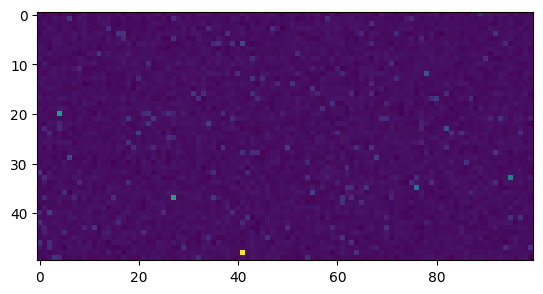

In [15]:
plt.imshow(ccd_new.data)

## The ccdproc package

The [ccdproc](https://ccdproc.readthedocs.io) coordinated package provides the essential tools for processing of CCD images in a framework that provides error propagation and bad pixel tracking throughout the reduction process. 